Recommendation systems

https://www.kaggle.com/datasets/gorkhachatryan01/purchase-behaviour?select=dataset.csv 

Работа с рекомендательными системами.
    Построение ассоциативных правил для датасета :
Можно использовать например apriori, association_rules, fpgrowth из mlxtend.frequent_patterns (работают чуть быстрее).
Написать выводы. 
    

In [1]:

import pandas as pd
import csv
import re
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

Набор данных записывает покупки отдельных товаров в строку. Сгруппируем эти покупки по корзинам товаров и удалим пустые значения.

In [2]:
df = pd.read_csv('dataset.csv', delimiter=',', header=None, skipinitialspace=True)
# Заменить значения NAN на пустую строку ''
df.fillna('', inplace=True)

basket = []
for i, row in df.iterrows():
    basket.append(row.loc[row != ''].unique().tolist())

In [ ]:
basket

С помощью TransactionEncoder мы закодируем транзакции в формат, подходящий для функции Apriori.

In [3]:
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


In [4]:
print(transactions.shape)

(1499, 38)


Алгоритм Apriori будет использоваться для генерации частых наборов элементов. Мы зададим минимальную поддержку в размере 6 из общего числа транзакций. Генерируются правила ассоциаций, и мы отфильтровываем значения Lift < 1,5 ,т.к. для значения lift >1,5 правил ассоциаций нет. Выбираем lift =1,4 , так более сильная связь в нашем наборе и их количество не минимально.

In [5]:
print(6/len(basket))

0.004002668445630421


In [6]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len =3)
for i in range(11, 21):
    value = i / 10
    if 1.1 <= value <= 2.0:
        rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = value)
        print(f"Lift = {value}, rules identified:{len(rules)} ")

Lift = 1.1, rules identified:9204 
Lift = 1.2, rules identified:3220 
Lift = 1.3, rules identified:850 
Lift = 1.4, rules identified:180 
Lift = 1.5, rules identified:22 
Lift = 1.6, rules identified:0 
Lift = 1.7, rules identified:0 
Lift = 1.8, rules identified:0 
Lift = 1.9, rules identified:0 
Lift = 2.0, rules identified:0 


In [7]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len =3)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.4)
display(rules.head(20))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(eggs, all- purpose)",(bagels),0.071381,0.278185,0.029353,0.411215,1.478204,0.009496,1.225939,0.348371
1,"(all- purpose, bagels)",(eggs),0.075384,0.268846,0.029353,0.389381,1.448341,0.009086,1.197397,0.334793
2,(eggs),"(all- purpose, bagels)",0.268846,0.075384,0.029353,0.109181,1.448341,0.009086,1.037940,0.423378
3,(bagels),"(eggs, all- purpose)",0.278185,0.071381,0.029353,0.105516,1.478204,0.009496,1.038161,0.448181
4,"(beef, all- purpose)",(fruits),0.068045,0.263509,0.026017,0.382353,1.451005,0.008087,1.192414,0.333517
5,(fruits),"(beef, all- purpose)",0.263509,0.068045,0.026017,0.098734,1.451005,0.008087,1.034051,0.422032
6,"(mixes, all- purpose)",(hand soap),0.070047,0.237492,0.024016,0.342857,1.443660,0.007381,1.160339,0.330464
7,(hand soap),"(mixes, all- purpose)",0.237492,0.070047,0.024016,0.101124,1.443660,0.007381,1.034573,0.403033
8,"(soap, hand soap)",(all- purpose),0.056037,0.263509,0.020680,0.369048,1.400512,0.005914,1.167269,0.302952
9,(all- purpose),"(soap, hand soap)",0.263509,0.056037,0.020680,0.078481,1.400512,0.005914,1.024355,0.388295


Rules identified:  180


In [8]:
frequent_itemsets

,support,itemsets
0,0.263509,(all- purpose)
1,0.264176,(aluminum foil)
2,0.278185,(bagels)
3,0.262842,(beef)
4,0.261508,(butter)
...,...,...
9172,0.030020,"(waffles, toilet paper, yogurt)"
9173,0.036024,"(tortillas, vegetables, waffles)"
9174,0.045364,"(tortillas, vegetables, yogurt)"
9175,0.014676,"(tortillas, waffles, yogurt)"


In [9]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(eggs, all- purpose)",(bagels),0.071381,0.278185,0.029353,0.411215,1.478204,0.009496,1.225939,0.348371
1,"(all- purpose, bagels)",(eggs),0.075384,0.268846,0.029353,0.389381,1.448341,0.009086,1.197397,0.334793
2,(eggs),"(all- purpose, bagels)",0.268846,0.075384,0.029353,0.109181,1.448341,0.009086,1.037940,0.423378
3,(bagels),"(eggs, all- purpose)",0.278185,0.071381,0.029353,0.105516,1.478204,0.009496,1.038161,0.448181
4,"(beef, all- purpose)",(fruits),0.068045,0.263509,0.026017,0.382353,1.451005,0.008087,1.192414,0.333517
...,...,...,...,...,...,...,...,...,...,...
175,(soda),"(soap, yogurt)",0.274183,0.062041,0.024016,0.087591,1.411820,0.007005,1.028003,0.401884
176,"(waffles, yogurt)",(toilet paper),0.078052,0.270180,0.030020,0.384615,1.423552,0.008932,1.185957,0.322721
177,"(yogurt, toilet paper)",(waffles),0.074049,0.278853,0.030020,0.405405,1.453834,0.009371,1.212839,0.337128
178,(waffles),"(yogurt, toilet paper)",0.278853,0.074049,0.030020,0.107656,1.453834,0.009371,1.037660,0.432871


<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
/var/folders/dj/qdtt8_0s0gzfptgftmg9zrch0000gp/T/ipykernel_6245/2633165278.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


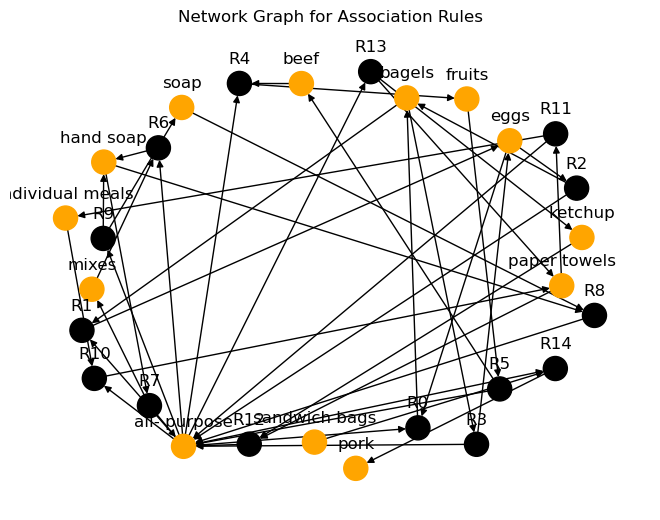

In [10]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()
  
  # Перебор количества правил для отображения
  for i in range(rules_to_show):
    
    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 15)

### Применение алгоритма в бизнесе
Допустим, владельцы магазина закупили слишком много beef и теперь беспокоятся, что товар пропадет, если его не удастся вовремя распродать. Что еще хуже, рентабельность продаж цельного молока настолько низка, что они не могут позволить себе промо-скидку, не потеряв при этом большую часть прибыли.

In [11]:
beef_rules = rules[rules['consequents'].astype(str).str.contains('beef')]
beef_rules = beef_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(beef_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pork),"(beef, mixes)",0.250167,0.065377,0.025350,0.101333,1.549986,0.008995,1.040011,0.473216
1,(sandwich bags),"(beef, cheeses)",0.250167,0.066711,0.025350,0.101333,1.518987,0.008661,1.038526,0.455656
2,"(lunch meat, shampoo)",(beef),0.069380,0.262842,0.026684,0.384615,1.463296,0.008449,1.197882,0.340215
3,(fruits),"(beef, all- purpose)",0.263509,0.068045,0.026017,0.098734,1.451005,0.008087,1.034051,0.422032
4,(pork),"(beef, ketchup)",0.250167,0.065377,0.023349,0.093333,1.427619,0.006994,1.030834,0.399466


In [12]:
print(beef_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True).head(10))

             antecedents           consequents  antecedent support  \
0                 (pork)         (beef, mixes)            0.250167   
1        (sandwich bags)       (beef, cheeses)            0.250167   
2  (lunch meat, shampoo)                (beef)            0.069380   
3               (fruits)  (beef, all- purpose)            0.263509   
4                 (pork)       (beef, ketchup)            0.250167   
5              (shampoo)    (lunch meat, beef)            0.248165   
6           (lunch meat)       (beef, shampoo)            0.276184   
7      (fruits, waffles)                (beef)            0.074049   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.065377  0.025350    0.101333  1.549986  0.008995    1.040011   
1            0.066711  0.025350    0.101333  1.518987  0.008661    1.038526   
2            0.262842  0.026684    0.384615  1.463296  0.008449    1.197882   
3            0.068045  0.026017    0.098734  1.451005

Например, мы можем установить промо-скидку на lunch meat, fruits, pork, sandwich bags,  shampoo. Некоторые ассоциации могут показаться контринтуитивными, но правила гласят, что эти продукты действительно стимулируют продажи цельного молока.

Применяя алгоритм Apriori и анализируя ассоциативные связи, предприятия могут вывести десятки стратегий, основанных на данных, для повышения доходов и прибыли. Правила ассоциаций имеют решающее значение для анализа покупательского поведения в процессе поиска данных. Некоторые из наиболее важных стратегий розничной торговли, такие как анализ клиентов, анализ рыночной корзины и кластеризация продуктов, способны дать ценные сведения в тандеме с анализом правил ассоциаций.

**Выводы**

Преобразовали dataset в формат подходящий для функции Apriori. Для алгоритма Apriori зададим минимальную поддержку в размере 6 из общего числа транзакций. Взяли lift=1.4 для того чтобы были самые правила и их было не минимальное количество, как при 1.5. 
Затем построили ориентированный граф с нашими ассоциативными правилами.
Рассмотрели алгоритм на связ с элементом beef и нашли зависимость между beef  lunch meat, fruits, pork, sandwich bags,  shampoo.




**Conclusions**

We transformed the dataset into a format suitable for the Apriori function. For the Apriori algorithm, we set a minimum support of 6 out of the total number of transactions. We chose lift=1.4 to have a good number of rules without it being minimal, as with 1.5.
Next, we constructed a directed graph with our association rules.
We examined the algorithm in relation to the 'beef' item and identified the association between 'beef' and items such as 'lunch meat', 'fruits', 'pork', 'sandwich bags', and 'shampoo'.